In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import stats
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_breast_cancer


# Comparison plots

In [3]:
import os
image_path = "./images/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)

image_path = "./images/max_degree/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)


In [5]:
from matplotlib.lines import Line2D
import matplotlib as mpl

# Get the 'tab20' colormap
cmap = mpl.colormaps.get_cmap('tab20')


data_path="./data/"
image_path = "./images/max_degree/"


In [15]:
def plot_maxdegree(arr3d, theta_vals):    
    fig, ax = plt.subplots(figsize=(5,3))

    i=0
    for datapoint_type in ["benign_test", "malignant_test"]:
        arr = arr3d[datapoint_type][:,:,:len(theta_vals)]

        # mean is over all the datapoints
        mean2d = np.mean(arr, axis=1)
        mean = np.mean(mean2d, axis=0)
        #print(mean.shape, theta_vals.shape)
        #print(mean)
        std = np.std(mean2d, axis=0)

        ax.plot(theta_vals, mean,linestyle="-",\
                color=cmap(i*2), label=datapoint_type)
        ax.fill_between(theta_vals, mean-std, mean+std, \
                        alpha=0.3, color=cmap(i*2))

        i+=1

    #ax.set_title('frac = %.1f, l = %d'%(frac, l))
    ax.set_xlabel(r"$\theta$", size=13)
    ax.set_ylabel(r"$Mean({deg}_{max})$")

    # Add a legend with custom handles and labels
    plt.legend(loc="best")


In [21]:
def plot_diff_maxdegree(arr3d, theta_vals):    
    fig, ax = plt.subplots(figsize=(5,3))
    arr3d_ben = arr3d["benign_test"][:,:,:len(theta_vals)]
    arr3d_mal = arr3d["malignant_test"][:,:,:len(theta_vals)]
    
    mean_arr = np.zeros((2, arr3d_mal.shape[2]))
    
    mean_diff = np.mean(np.abs(np.mean(arr3d_ben, axis=1) - np.mean(arr3d_mal, axis=1)), axis=0)
    std_diff = np.std(np.abs(np.mean(arr3d_ben, axis=1) - np.mean(arr3d_mal, axis=1)), axis=0)
    
    ax.plot(theta_vals, mean_diff, linestyle="-",\
            color=cmap(0))
    ax.fill_between(theta_vals, mean_diff-std_diff, mean_diff+std_diff, \
                    alpha=0.3, color=cmap(0))

    #ax.set_title('frac = %.1f, l = %d'%(frac, l))
    ax.set_xlabel(r"$\theta$", size=13)
    ax.set_ylabel(r"$\Delta Mean({deg}_{max})$")

    

In [9]:
init_theta = 0.005
fin_theta = 0.3
step_theta = 0.005
# instead of entire range, we need to set a shorter range

theta_vals = np.arange(init_theta, fin_theta+step_theta, step_theta)


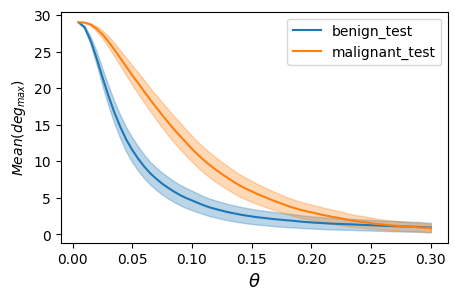

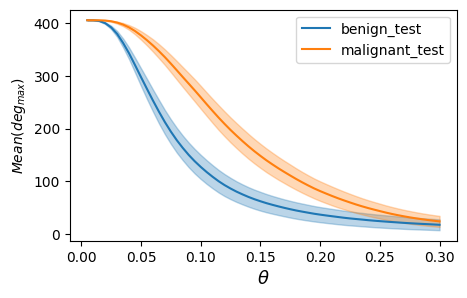

In [17]:
for uniform_size in [2,3]:
    arr3d = np.load(data_path+"maxdeg_us%d.npz"%uniform_size) 

    plot_maxdegree(arr3d, theta_vals)

    #plt.title("Uniform size = %d"%uniform_size, size=14)
    plt.savefig(image_path+"dmax_us%d.pdf"%uniform_size, \
            facecolor="white", bbox_inches="tight", dpi=600)
    #plt.close()
    plt.show()

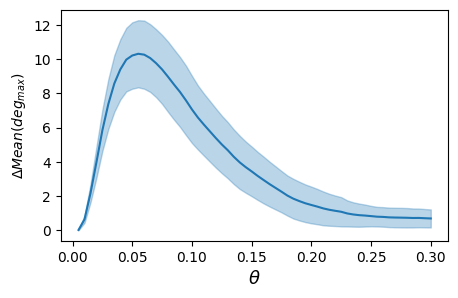

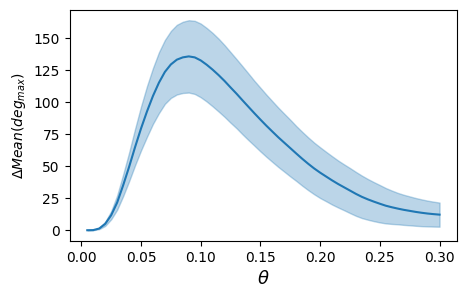

In [22]:
for uniform_size in [2,3]:

    arr3d = np.load(data_path+"maxdeg_us%d.npz"%uniform_size) 

    plot_diff_maxdegree(arr3d, theta_vals)

    #plt.title("Uniform size = %d"%uniform_size,size=14)
    plt.savefig(image_path+"diff_dmax_us%d.pdf"%uniform_size, \
            facecolor="white", bbox_inches="tight", dpi=300)
    #plt.close()
    plt.show()

### Rank correlation between Benign and Malign for fixed Uniform size 2 and 3

In [27]:
data["top_2"]["benign_test"]["rz_0"]

{'worst compactness': [2, 29, 8, 4, 25, 2, 5, 6, 2],
 'texture error': [5, 29, 2, 24, 7, 13, 27, 3],
 'mean texture': [19, 6, 1, 5, 3],
 'worst texture': [5, 5, 1, 5, 1],
 'mean symmetry': [29, 1, 1, 9],
 'mean smoothness': [1, 16, 1],
 'mean compactness': [1, 1, 11],
 'symmetry error': [10, 18, 20],
 'worst area': [11, 11, 5],
 'worst concavity': [1, 23, 11],
 'worst concave points': [12, 1, 8],
 'worst symmetry': [1, 1, 10],
 'mean perimeter': [1, 1],
 'mean concave points': [4, 7],
 'mean fractal dimension': [4, 1],
 'radius error': [1, 29],
 'perimeter error': [1, 29],
 'compactness error': [6, 9],
 'concave points error': [29, 4],
 'worst smoothness': [25, 1],
 'worst fractal dimension': [29, 1],
 'mean radius': [1],
 'fractal dimension error': [15],
 'mean area': [],
 'mean concavity': [],
 'area error': [],
 'smoothness error': [],
 'concavity error': [],
 'worst radius': [],
 'worst perimeter': []}

In [6]:
%%time
# Kendall tau rank correlation plots
n_realizations = 100
        
for uniform_size in [2,3]:

    # Load the JSON file
    with open(data_path+'top_feat_us%d.json'%uniform_size, 'r') as json_file:
        data = json.load(json_file)

    ktau_arr = np.zeros((5,n_realizations))# l x num_realizations
    #ktau_pval_arr = np.zeros((5,100))

    for top_l in [1,2,3,4,5]:
        for rz in range(n_realizations):
            rnkfeats_ben = list(data["top_%d"%top_l]["benign_test"]["rz_%d"%rz].keys())
            rnkfeats_mal = list(data["top_%d"%top_l]["malignant_test"]["rz_%d"%rz].keys())

            res = stats.kendalltau(rnkfeats_ben, rnkfeats_mal)
            ktau_arr[top_l-1, rz] = res.statistic
            #ktau_pval_arr[top_l-1, rz] = res.pvalue
    
    ########### Plotting ##############################
    fig, ax = plt.subplots(figsize=(5,3))

    arr_mean = np.mean(ktau_arr, axis=1)
    arr_sd = np.std(ktau_arr, axis=1)

    x, y, error = [1,2,3,4,5], arr_mean, arr_sd

    ax.errorbar(x, y, yerr=error, fmt='-o', capsize=3)

    #ax.set_yscale('log')

    #ax.set_title('Uniform size = %d'%uniform_size)
    ax.set_xlabel("top 'l' ranked feats.", size=13)
    ax.set_ylabel("Kendall tau rank correlation\nBenign vs Malignant")
    #ax.legend(loc="best")
    #ax.set_ylim([0, 21])
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    plt.savefig(image_path+"ktau_us%d.pdf"%uniform_size, \
                facecolor="white", bbox_inches="tight", dpi=600)

    plt.close()    



CPU times: user 3.05 s, sys: 6.08 s, total: 9.13 s
Wall time: 958 ms


## Bar plots

In [7]:
# Consider l=3 and do analysis, plot bar plot and box plot
top_l = 3

theta_max = 0.07

cancer_dict = load_breast_cancer()
s=2
n_realizations=100

for uniform_size in [2,3]:
    for datapoint_type in ["benign_test", "malignant_test"]:

        ######### Collecting data to plot. ##########
        # Load the JSON file
        with open(data_path+'top_feat_us%d.json'%uniform_size, 'r') as json_file:
            data = json.load(json_file)

        feat_dict = {}
        for feat in cancer_dict.feature_names:
            feat_dict[feat] = []
            for rz in range(n_realizations):
                feat_dict[feat].append(len(data["top_%d"%top_l][datapoint_type]["rz_%d"%rz][feat]))

        sorted_dict = dict(sorted(feat_dict.items(), key=lambda x: sum(x[1])/len(x[1]), reverse=True))

        ########### Plotting. ###########################

        # plotting here:
        M = np.load(data_path+"extract_hedges_us%d.npz"%uniform_size)[datapoint_type].shape[1]

        df = pd.DataFrame()
        df["features"] = list(sorted_dict.keys())
        df["norm_mean_freq"] = [np.mean(val)/M for val in sorted_dict.values() ]
        df["norm_std_freq"] = [np.std(val)/M for val in sorted_dict.values() ]

        plt.figure(figsize=(8,4))
        #sns.barplot(list(node_topldeg_dict.keys()), len(list(node_topldeg_dict.values())))
        bp = sns.barplot(df, x="features", y = "norm_mean_freq")
        bp.set_xticklabels(bp.get_xticklabels(), 
                              rotation=55, 
                              horizontalalignment='right')
        plt.errorbar(df["features"], df["norm_mean_freq"], yerr=df["norm_std_freq"], fmt=".", color="k")

        #plt.title("%s, $theta_{max}$ = %.2f, unif size = %d, s=%d,\ntop %d ranked feats. per instance"%(datapoint_type, theta_max, uniform_size,s, top_l))
        print("%s, $theta_{max}$ = %.2f, unif size = %d, s=%d,\ntop %d ranked feats. per instance"%(datapoint_type, theta_max, uniform_size,s, top_l))

        plt.savefig(image_path+'%s_us%d_feat_barplot.pdf'%(datapoint_type,uniform_size),\
                facecolor="white", bbox_inches="tight", dpi=600)
        plt.close()


benign_test, $theta_{max}$ = 0.07, unif size = 2, s=2,
top 3 ranked feats. per instance
malignant_test, $theta_{max}$ = 0.07, unif size = 2, s=2,
top 3 ranked feats. per instance
benign_test, $theta_{max}$ = 0.07, unif size = 3, s=2,
top 3 ranked feats. per instance
malignant_test, $theta_{max}$ = 0.07, unif size = 3, s=2,
top 3 ranked feats. per instance


## Bar plot diff benign and malignant

In [8]:
# Consider l=3 and do analysis, plot bar plot and box plot
top_l = 3
theta_max = 0.07
cancer_dict = load_breast_cancer()
s=2
n_realizations=100

for uniform_size in [2, 3]:
    
    M_mal = np.load(data_path+"extract_hedges_us%d.npz"%uniform_size)["malignant_test"].shape[1]# 357
    M_ben = np.load(data_path+"extract_hedges_us%d.npz"%uniform_size)["benign_test"].shape[1] # 53
    
    # Load the JSON file
    with open(data_path+'top_feat_us%d.json'%uniform_size, 'r') as json_file:
        data = json.load(json_file)

    ######### Collecting data to plot. ##########
    feat_dict = {}
    for feat in cancer_dict.feature_names:
        feat_dict[feat] = []
        for rz in range(n_realizations):
            diff = (len(data["top_%d"%top_l]["malignant_test"]["rz_%d"%rz][feat])/M_mal-\
                         len(data["top_%d"%top_l]["benign_test"]["rz_%d"%rz][feat])/M_ben)
            feat_dict[feat].append(diff)

    sorted_dict = dict(sorted(feat_dict.items(), key=lambda x: sum(x[1])/len(x[1]), reverse=True))
    
    
    df = pd.DataFrame()
    df["features"] = list(sorted_dict.keys())
    df["norm_mean_freq"] = [np.mean(val) for val in sorted_dict.values() ]
    df["norm_std_freq"] = [np.std(val) for val in sorted_dict.values() ]

    import seaborn as sns
    plt.figure(figsize=(8,4))
    #sns.barplot(list(node_topldeg_dict.keys()), len(list(node_topldeg_dict.values())))
    bp = sns.barplot(df, x="features", y = "norm_mean_freq")
    bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=55, 
                          horizontalalignment='right')
    plt.errorbar(df["features"], df["norm_mean_freq"], yerr=df["norm_std_freq"], fmt=".", color="k")

    #plt.title("diff(mal,ben), $theta_{max}$ = %.2f, unif size = %d, s=%d,\ntop %d ranked feats. per instance"%(theta_max, uniform_size,s, top_l))
    print("%s, $theta_{max}$ = %.2f, unif size = %d, s=%d,\ntop %d ranked feats. per instance"%(datapoint_type, theta_max, uniform_size,s, top_l))

    plt.savefig(image_path+'diff_us%d_feat_barplot.pdf'%(uniform_size),\
            facecolor="white", bbox_inches="tight", dpi=600)
    plt.close()
    


malignant_test, $theta_{max}$ = 0.07, unif size = 2, s=2,
top 3 ranked feats. per instance
malignant_test, $theta_{max}$ = 0.07, unif size = 3, s=2,
top 3 ranked feats. per instance


## Box plots

In [9]:
# Consider l=3 and do analysis, plot bar plot and box plot
top_l = 3
theta_max = 0.07
cancer_dict = load_breast_cancer()
s=2
n_realizations=100

# collect ordered feature names


for uniform_size in [2,3]:
    for datapoint_type in ["benign_test", "malignant_test"]:

        # Load the JSON file
        with open(data_path+'top_feat_us%d.json'%uniform_size, 'r') as json_file:
            data = json.load(json_file)

        feat_dict = {}
        for feat in cancer_dict.feature_names:
            feat_dict[feat] = []
            for rz in range(n_realizations):
                feat_dict[feat].append(len(data["top_%d"%top_l][datapoint_type]["rz_%d"%rz][feat]))

        sorted_dict = dict(sorted(feat_dict.items(), key=lambda x: sum(x[1])/len(x[1]), reverse=True))

        feat_dict = {}
        for feat in sorted_dict.keys():
            feat_dict[feat] = []
            for rz in range(n_realizations):
                feat_dict[feat]+=data["top_%d"%top_l][datapoint_type]["rz_%d"%rz][feat]



        ########### Plotting ###################
        fig, ax = plt.subplots(figsize=(5, 3))

        # or backwards compatable 
        feat_dict = dict(list(feat_dict.items())[0: 10]) 
        labels, deg_data = feat_dict.keys(), feat_dict.values()

        # Convert the dictionary to a DataFrame for plotting
        df = pd.DataFrame([(k, val) for k, v in feat_dict.items() for val in v], columns=['features', 'node degree'])

        #sns.boxplot(data=df, x='features', y='node degree', ax=ax)
        ax.boxplot(deg_data, positions=range(len(labels)))

        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=35,ha='right')
        #plt.ylabel("Node degree")
        #plt.title("%s, $theta_{max}$ = %.2f, unif size = %d, s=%d,\ntop %d ranked feats. per instance"%(datapoint_type, theta_max, uniform_size,s, top_l), size=10)

        plt.savefig(image_path+'%s_us%d_feat_boxplot.pdf'%(datapoint_type,uniform_size),\
                facecolor="white", bbox_inches="tight", dpi=600)

        plt.close()            


# Screening tests and classification

In [4]:
class compute_screening_statistics():
    
    def __init__(self, TP, FN, FP, TN):
        self.TP = TP
        self.FN = FN
        self.FP = FP
        self.TN = TN
    
    def sensitivity(self):
        return self.TP/(self.TP+self.FN)
    
    def specificity(self):
        return self.TN/(self.TN+self.FP)
    
    def accuracy(self):
        return (self.TP+self.TN)/(self.TP+self.TN+self.FN+self.FP)

In [22]:
import math
cancer_dict = load_breast_cancer()

dist_type, uniform_size ='min', 3

n_features = len(cancer_dict.feature_names)

init_theta = 0.005
fin_theta = 1.7
step_theta = 0.005

# instead of entire range, we need to set a shorter range
theta_vals = np.arange(init_theta, fin_theta+step_theta, step_theta)
n_comb = math.comb(n_features, uniform_size)



In [23]:
# Misclassification error
data_path = "./data/"
    
arr_benign = np.load(data_path+"extract_hedges_us%d.npz"%uniform_size)["benign_test"]
arr_malignant = np.load(data_path+"extract_hedges_us%d.npz"%uniform_size)["malignant_test"]


#arr_benign = np.load(data_path+"hedges_%s_us%d.npy"%("benign_test", uniform_size))
#arr_malignant = np.load(data_path+"hedges_%s_us%d.npy"%("malignant_test", uniform_size))


In [24]:
# looping over each threshold and 
# finding sensitivity, specificity, accuracy
sensitivity_list = np.zeros((arr_benign.shape[0],arr_benign.shape[2]))
specificity_list = np.zeros((arr_benign.shape[0],arr_benign.shape[2]))
accuracy_list = np.zeros((arr_benign.shape[0],arr_benign.shape[2]))

for j in range(arr_benign.shape[2]):

    # true positives
    # malignant correctly identified as malignant
    # shouldn't be identified as nan since there should exist hypergraph
    #TP = sum(~np.isnan(arr_malignant[:,j,0]))
    TP = np.sum(np.any(arr_malignant[:,:,j,:], axis=2), axis=1)
    
    # False negative: Sick people incorrectly identified as healthy
    #FN = sum(np.isnan(arr_malignant[:,j,0]))
    FN = np.sum(~np.any(arr_malignant[:,:,j,:], axis=2), axis=1)#sum(arr_malignant[:,:,j,0]==0)
    
    # False positive: Healthy people incorrectly identified as sick
    #FP = sum(~np.isnan(arr_benign[:,j,0]))
    FP = np.sum(np.any(arr_benign[:,:,j,:], axis=2), axis=1)
    
    #True negative: Healthy people correctly identified as healthy
    #TN = sum(np.isnan(arr_benign[:,j,0]))
    TN = np.sum(~np.any(arr_benign[:,:,j,:], axis=2), axis=1)
    
    stats = compute_screening_statistics(TP, FN, FP, TN)
    
    sensitivity_list[:,j] = stats.sensitivity()
    specificity_list[:,j] = stats.specificity()
    accuracy_list[:,j] = stats.accuracy()



In [9]:
import os
image_path = "./images/screening_tests/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)


In [10]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from scipy.integrate import simpson

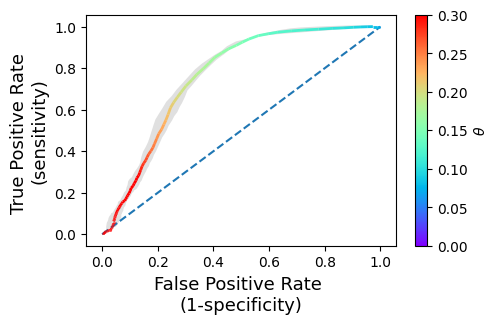

ROC curve, unif size =3
AUC score: 0.760200, Range = (0.748305,0.778312)


In [25]:
# ROC curve


# True positive rate = sensitivity

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize


TPR = sensitivity_list
FPR = 1-np.array(specificity_list)
fig, ax = plt.subplots(figsize=(5,3))

# use min and max for future analysis


mean_FPR, std_FPR = np.mean(FPR, axis=0), np.std(FPR, axis=0)
mean_TPR, std_TPR = np.mean(TPR, axis=0), np.std(TPR, axis=0)

x,y = mean_FPR, mean_TPR

# Create a set of line segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

#norm = Normalize(theta_vals.min(), theta_vals.max())
norm = Normalize(0.0, 0.3)

lc = LineCollection(segments, array=theta_vals, cmap="rainbow",
                    norm=norm, linewidth=2,zorder=3)#, alpha=alpha)

ax = plt.gca()
ax.add_collection(lc)

ax.autoscale()
cbar = fig.colorbar(lc)
cbar.set_label(r'$\theta$')

#ax.fill_between(mean_FPR, mean_TPR-std_TPR,mean_TPR+std_TPR, alpha=0.3, color='grey')

x1, y1 = mean_FPR-std_FPR, mean_TPR-std_TPR
x2, y2 = mean_FPR+std_FPR, mean_TPR+std_TPR
#ax.plot(mean_FPR-std_FPR, mean_TPR-std_TPR, "gray")
#ax.plot(mean_FPR+std_FPR, mean_TPR+std_TPR, "gray")
plt.fill(np.append(x1, x2[::-1]), np.append(y1, y2[::-1]), 
         'lightgrey', alpha=0.7,zorder=0)


#########. need to change here.  ############
ax.plot(np.arange(0.0,1+0.1,0.1), np.arange(0.0,1+0.1,0.1), "--",zorder=1)


auc_score = metrics.auc(mean_FPR, mean_TPR)
#max_auc_score = metrics.auc(mean_FPR+std_FPR, mean_TPR+std_TPR)
#min_auc_score = metrics.auc(mean_FPR-std_FPR, mean_TPR-std_TPR)
min_auc_score = simpson((mean_TPR+std_TPR)[::-1], (mean_FPR+std_FPR)[::-1], dx=0.001)
max_auc_score = simpson((mean_TPR-std_TPR)[::-1], (mean_FPR-std_FPR)[::-1], dx=0.001)

#ax.set_title('ROC curve, unif size =%d\nAUC score: %f, Range = (%f,%f)'%(uniform_size, auc_score, min_auc_score, max_auc_score),
#             size=10)
ax.set_xlabel("False Positive Rate \n(1-specificity)", size=13)
ax.set_ylabel("True Positive Rate \n(sensitivity)", size=13)

#plt.legend(loc='best')
plt.savefig(image_path+'roc_curve_us%d.pdf'%uniform_size,\
        facecolor="white", bbox_inches="tight", dpi=600)

plt.show()
print('ROC curve, unif size =%d\nAUC score: %f, Range = (%f,%f)'%(uniform_size, auc_score, min_auc_score, max_auc_score))

In [ ]:
# ROC curve, unif size =2
# AUC score: 0.770888, Range = (0.759578,0.787640)

In [ ]:
# ROC curve, unif size =3
# AUC score: 0.760200, Range = (0.748305,0.778312)

# Combined unif size 2 and unif size 3


In [14]:
import math
cancer_dict = load_breast_cancer()

dist_type ='min'

n_features = len(cancer_dict.feature_names)

init_theta = 0.005
fin_theta = 1.7
step_theta = 0.005

# instead of entire range, we need to set a shorter range
theta_vals = np.arange(init_theta, fin_theta+step_theta, step_theta)
n_comb = math.comb(n_features, uniform_size)


In [15]:
# Misclassification error
data_path = "./data/"
    
arr_benign_us2 = np.load(data_path+"extract_hedges_us%d.npz"%2)["benign_test"]
arr_malignant_us2 = np.load(data_path+"extract_hedges_us%d.npz"%2)["malignant_test"]

arr_benign_us3 = np.load(data_path+"extract_hedges_us%d.npz"%3)["benign_test"]
arr_malignant_us3 = np.load(data_path+"extract_hedges_us%d.npz"%3)["malignant_test"]


In [18]:
# looping over each threshold and 
# finding sensitivity, specificity, accuracy
sensitivity_list = np.zeros((arr_benign_us2.shape[0],arr_benign_us2.shape[2]))
specificity_list = np.zeros((arr_benign_us2.shape[0],arr_benign_us2.shape[2]))
accuracy_list = np.zeros((arr_benign_us2.shape[0],arr_benign_us2.shape[2]))

for j in range(arr_benign_us2.shape[2]):

    # true positives
    # malignant correctly identified as malignant
    # shouldn't be identified as nan since there should exist hypergraph
    #TP = sum(~np.isnan(arr_malignant[:,j,0]))
    comb = np.logical_and(np.any(arr_malignant_us2[:,:,j,:], axis=2),
                         np.any(arr_malignant_us3[:,:,j,:], axis=2))
    TP = np.sum(comb, axis=1)
    
    # False negative: Sick people incorrectly identified as healthy
    #FN = sum(np.isnan(arr_malignant[:,j,0]))
    comb = np.logical_and(~np.any(arr_malignant_us2[:,:,j,:], axis=2),
                         ~np.any(arr_malignant_us3[:,:,j,:], axis=2))
    
    FN = np.sum(comb, axis=1)#sum(arr_malignant[:,:,j,0]==0)
    
    # False positive: Healthy people incorrectly identified as sick
    #FP = sum(~np.isnan(arr_benign[:,j,0]))
    comb = np.logical_and(np.any(arr_benign_us2[:,:,j,:], axis=2),
                         np.any(arr_benign_us3[:,:,j,:], axis=2))
    FP = np.sum(comb, axis=1)
    
    #True negative: Healthy people correctly identified as healthy
    #TN = sum(np.isnan(arr_benign[:,j,0]))
    comb = np.logical_and(~np.any(arr_benign_us2[:,:,j,:], axis=2),
                         ~np.any(arr_benign_us3[:,:,j,:], axis=2))
    TN = np.sum(comb, axis=1)
    
    stats = compute_screening_statistics(TP, FN, FP, TN)
    
    sensitivity_list[:,j] = stats.sensitivity()
    specificity_list[:,j] = stats.specificity()
    accuracy_list[:,j] = stats.accuracy()



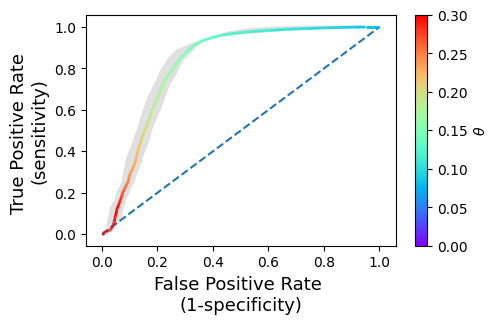

ROC curve, unif size =Comb
AUC score: 0.821203, Range = (0.807122,0.846036)


In [21]:
# ROC curve


# True positive rate = sensitivity

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize


TPR = sensitivity_list
FPR = 1-np.array(specificity_list)
fig, ax = plt.subplots(figsize=(5,3))

# use min and max for future analysis


mean_FPR, std_FPR = np.mean(FPR, axis=0), np.std(FPR, axis=0)
mean_TPR, std_TPR = np.mean(TPR, axis=0), np.std(TPR, axis=0)

x,y = mean_FPR, mean_TPR

# Create a set of line segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

#norm = Normalize(theta_vals.min(), theta_vals.max())
norm = Normalize(0.0, 0.3)

lc = LineCollection(segments, array=theta_vals, cmap="rainbow",
                    norm=norm, linewidth=2,zorder=3)#, alpha=alpha)

ax = plt.gca()
ax.add_collection(lc)

ax.autoscale()
cbar = fig.colorbar(lc)
cbar.set_label(r'$\theta$')

#ax.fill_between(mean_FPR, mean_TPR-std_TPR,mean_TPR+std_TPR, alpha=0.3, color='grey')

x1, y1 = mean_FPR-std_FPR, mean_TPR-std_TPR
x2, y2 = mean_FPR+std_FPR, mean_TPR+std_TPR
#ax.plot(mean_FPR-std_FPR, mean_TPR-std_TPR, "gray")
#ax.plot(mean_FPR+std_FPR, mean_TPR+std_TPR, "gray")
plt.fill(np.append(x1, x2[::-1]), np.append(y1, y2[::-1]), 
         'lightgrey', alpha=0.7,zorder=0)


#########. need to change here.  ############
ax.plot(np.arange(0.0,1+0.1,0.1), np.arange(0.0,1+0.1,0.1), "--",zorder=1)


auc_score = metrics.auc(mean_FPR, mean_TPR)
#max_auc_score = metrics.auc(mean_FPR+std_FPR, mean_TPR+std_TPR)
#min_auc_score = metrics.auc(mean_FPR-std_FPR, mean_TPR-std_TPR)
min_auc_score = simpson((mean_TPR+std_TPR)[::-1], (mean_FPR+std_FPR)[::-1], dx=0.001)
max_auc_score = simpson((mean_TPR-std_TPR)[::-1], (mean_FPR-std_FPR)[::-1], dx=0.001)

#ax.set_title('ROC curve, unif size =%d\nAUC score: %f, Range = (%f,%f)'%(uniform_size, auc_score, min_auc_score, max_auc_score),
#             size=10)
ax.set_xlabel("False Positive Rate \n(1-specificity)", size=13)
ax.set_ylabel("True Positive Rate \n(sensitivity)", size=13)

#plt.legend(loc='best')
plt.savefig(image_path+'roc_curve_us%s.pdf'%"Comb",\
        facecolor="white", bbox_inches="tight", dpi=600)

plt.show()
print('ROC curve, unif size =%s\nAUC score: %f, Range = (%f,%f)'%("Comb", auc_score, min_auc_score, max_auc_score))

In [13]:
import numpy as np

# Create two 2D arrays
arr1 = np.array([[1, 0, 1], [0, 1, 0], [1, 1, 1]])
arr2 = np.array([[0, 1, 0], [1, 0, 1], [0, 0, 1]])

# Perform element-wise OR operation
result = np.logical_or(arr1, arr2)
print(arr1)
print("\n", arr2)
print("\n",result)


[[1 0 1]
 [0 1 0]
 [1 1 1]]

 [[0 1 0]
 [1 0 1]
 [0 0 1]]

 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
